# Prospecting areas for the development of profitable oil wells <a class='tocSkip' ></a>

## Project Description <a class='tocSkip' ></a> <a id='home'></a>

This project is carried out for the company **OilyGiant** with the objective of finding the best place among three regions for the drilling of a new oil well. The selection of said area is based on the following criteria:

* Parameters of the oil well in each region: oil quality and volume of reserves
* Prediction of the volume of reservations in each region
* Selection of the wells with the highest estimated values
* Choice of the region with the highest total benefit for the selected wells

For the choice of the region with the highest profit margin for the company, a model will be created taking into account the aforementioned criteria and **only the regions with a risk of loss of less than 2.5%** will be maintained.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-prepare-the-data" data-toc-modified-id="Load-and-prepare-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load and prepare the data</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Data-preparation:-Standardization-of-variables" data-toc-modified-id="Data-preparation:-Standardization-of-variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data preparation: Standardization of variables</a></span></li></ul></li><li><span><a href="#Train-and-test-the-model-for-each-region-" data-toc-modified-id="Train-and-test-the-model-for-each-region--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train and test the model for each region <a id="2" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Data-segmentation" data-toc-modified-id="Data-segmentation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data segmentation</a></span></li><li><span><a href="#Linear-regression-models-by-region" data-toc-modified-id="Linear-regression-models-by-region-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear regression models by region</a></span></li></ul></li><li><span><a href="#Economic-profit-estimates" data-toc-modified-id="Economic-profit-estimates-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Economic profit estimates</a></span></li><li><span><a href="#Calculation-of-earnings-and-prediction-modeling" data-toc-modified-id="Calculation-of-earnings-and-prediction-modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculation of earnings and prediction modeling</a></span></li><li><span><a href="#Calculation-of-risks-and-revenues-for-each-region" data-toc-modified-id="Calculation-of-risks-and-revenues-for-each-region-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculation of risks and revenues for each region</a></span></li><li><span><a href="#Final-recommendations" data-toc-modified-id="Final-recommendations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final recommendations</a></span></li></ul></div>

In [30]:
# Libraries

import pandas as pd                                  # DataFrame manipulation
import numpy as np                                   # Manipulation of numeric arrays
import matplotlib.pyplot as plt                      # Plotting

from scipy import stats as st                        # Statistical tests
from sklearn.preprocessing import StandardScaler     # Scaling numeric variables
from sklearn.model_selection import train_test_split # Data segmentation for training and validation
from sklearn.linear_model import LinearRegression    # Linear regression
from sklearn.metrics import mean_squared_error       # MSE metric

# Load and prepare the data 


## Load data

We have data from three regions stored in three files: `geo_data_0.csv`, `geo_data_1.csv`, and `geo_data_2.csv`. Each file is made up of the same columns.

* `id`: unique oil well identifier
* `f0`, `f1` and `f2`: are three features of points (their specific meaning is not important, but the features themselves are significant)
* `product`: volume of reserves in the oil well (in thousands of barrels)

Since the well `id` is not a feature that contributes to model predictions, we are going to load the data by dropping this column and keeping only the remaining 4 variables. The data of each region will be stored in the DataFrame **`reg1`**, **`reg2`** and **`reg3`**.

The information of each DataFrame will be inspected to analyze data types and missing data.

In [3]:
# Data loading 'id'
reg1 = pd.read_csv('datasets/geo_data_0.csv', usecols=['f0','f1','f2','product'])
reg2 = pd.read_csv('datasets/geo_data_1.csv', usecols=['f0','f1','f2','product'])
reg3 = pd.read_csv('datasets/geo_data_2.csv', usecols=['f0','f1','f2','product'])

In [4]:
# Information of each DataFrame
regions = [reg1, reg2, reg3]

for r in regions: print(r.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  fl

In [5]:
# Visualization of region 1 DataFrame
reg1.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


All DataFrames are the same size with 100,000 rows each. All variables are of numeric type and there are no missing values in any DataFrame.

## Data preparation: Standardization of variables

The variables with which we are going to train our predictive model are numerical, so care must be taken that the range and dispersion of each variable does not influence the weight that each variable has in the model's predictions. In the visualization of the data we can see that the values taken by the parameters of the wells have ranges with negative and positive values, so this can influence the weight of each variable by having a greater variance. Let's see the basic statistics for each variable.

In [6]:
# Descripción estadistica de variables
for r in regions:
    print(r[['f0','f1','f2']].describe(),'\n')

                  f0             f1             f2
count  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647
std         0.871832       0.504433       3.248248
min        -1.408605      -0.848218     -12.088328
25%        -0.072580      -0.200881       0.287748
50%         0.502360       0.250252       2.515969
75%         1.073581       0.700646       4.715088
max         2.362331       1.343769      16.003790 

                  f0             f1             f2
count  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541
std         8.965932       5.119872       1.703572
min       -31.609576     -26.358598      -0.018144
25%        -6.298551      -8.267985       1.000021
50%         1.153055      -4.813172       2.011479
75%         8.621015      -1.332816       3.999904
max        29.421755      18.734063       5.019721 

                  f0             f1             f2
count  100000.000000  10000

It can be seen that the behavior of the standard deviation (see 'std') for each parameter is not homogeneous between parameters within and between regions, so it is necessary to **standardize** these variables.

In [7]:
# Scaling numeric variables

numeric = ['f0','f1','f2']
scaler = StandardScaler()

for r in regions:
    scaler.fit(r[numeric])
    r[numeric] = scaler.transform(r[numeric])

In [8]:
# Description of scaled dataframes
for r in regions:
    print(r[numeric].describe(),'\n')

                 f0            f1            f2
count  1.000000e+05  1.000000e+05  1.000000e+05
mean   1.953993e-17 -5.336176e-17  9.695356e-17
std    1.000005e+00  1.000005e+00  1.000005e+00
min   -2.189681e+00 -2.177430e+00 -4.491975e+00
25%   -6.572397e-01 -8.941262e-01 -6.818784e-01
50%    2.226500e-03  2.166008e-04  4.101360e-03
75%    6.574259e-01  8.930937e-01  6.811217e-01
max    2.135642e+00  2.168043e+00  4.156460e+00 

                 f0            f1            f2
count  1.000000e+05  1.000000e+05  1.000000e+05
mean  -6.394885e-18  1.708855e-17  1.467981e-16
std    1.000005e+00  1.000005e+00  1.000005e+00
min   -3.652831e+00 -4.211458e+00 -1.474959e+00
25%   -8.297949e-01 -6.780293e-01 -8.772907e-01
50%    1.311571e-03 -3.240857e-03 -2.835602e-01
75%    8.342420e-01  6.765366e-01  8.836555e-01
max    3.154229e+00  4.595967e+00  1.482293e+00 

                 f0            f1            f2
count  1.000000e+05  1.000000e+05  1.000000e+05
mean   2.360778e-17 -1.499245e-17 -1

The standard deviation ('std') has been homogenized to 1 so we can be sure that we have correctly standardized our characteristics. Now we can proceed to prepare the predictive models for each region.

# Train and test the model for each region <a id='2' ></a>

At this stage we are going to build the **Linear Regression** models to predict the oil reserves in each region. The predictive 'features' are the well parameters (i.e. `'f0'`, `'f1'` and `'f2'`) and the 'target' variable is `'product'`.


## Data segmentation

Before training the linear regression models, it is necessary to separate the 'features' and 'target' variables and segment the data into training and validation sets in a 3:1 ratio. For this we are going to create the `splitter()` function that performs the two operations (separation of variables and segmentation) in a single step and later we are going to apply the function to each DataFrame.

In [9]:
# Función para separar y segmentar datos 'splitter'

def splitter(dataframe):
    # Separar caracteristicas y objetivo
    features = dataframe.drop('product', axis=1)
    target   = dataframe['product']
    
    # Segmentacion de datos con proporción 3:1 - entrenamiento:validación
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    # Retorno de conjuntos de entrenamiento y validación
    return features_train, features_valid, target_train, target_valid

In [10]:
# Application of the splitter function for each dataframe
# Check the size of each set

r1_features_train, r1_features_valid, r1_target_train, r1_target_valid = splitter(reg1)
print(r1_features_train.shape, r1_features_valid.shape, r1_target_train.shape, r1_target_valid.shape, '\n')

r2_features_train, r2_features_valid, r2_target_train, r2_target_valid = splitter(reg2)
print(r2_features_train.shape, r2_features_valid.shape, r2_target_train.shape, r2_target_valid.shape, '\n')

r3_features_train, r3_features_valid, r3_target_train, r3_target_valid = splitter(reg3)
print(r3_features_train.shape, r3_features_valid.shape, r3_target_train.shape, r3_target_valid.shape, '\n')

(75000, 3) (25000, 3) (75000,) (25000,) 

(75000, 3) (25000, 3) (75000,) (25000,) 

(75000, 3) (25000, 3) (75000,) (25000,) 



We have separated the 'features' and 'target' variables and segmented the data into a training (75,000 records) and validation (25,000 records) set for each region. Now we are going to train the linear regression models for each region.

## Linear regression models by region

We are going to train the linear regression models using the training set and get the model predictions using the validation set. The predictions and correct answers for the validation set will be used to derive the average volume of forecast bookings for each region. Additionally, the quality of the model will be evaluated using the RECM (square root of the mean square error).

Since this workflow is going to be repeated for each region, we are going to create the **`modelrl`** function which will train the model, get the predictions and the RECM from it.

In [11]:
# Function 'modelrl'
def modelrl(features_train, target_train, features_valid, target_valid):
    # Model fitting
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    # Get predictions
    predictions = model.predict(features_valid)
    
    # Evaluate MSE
    recm = mean_squared_error(target_valid, predictions) ** 0.5
    
    # Results
    return predictions, recm

In [12]:
## Region 1
predictions_reg1, recm_reg1 = modelrl(r1_features_train, r1_target_train, r1_features_valid , r1_target_valid)
print(f'Estimated average volume for Region 1: {predictions_reg1.mean()}')
print(f'MSE Region 1: {recm_reg1} \n')

## Region 2
predictions_reg2, recm_reg2 = modelrl(r2_features_train, r2_target_train, r2_features_valid , r2_target_valid)
print(f'Estimated average volume for Region 2: {predictions_reg2.mean()}')
print(f'MSE Region 2: {recm_reg2} \n')

## Region 3
predictions_reg3, recm_reg3 = modelrl(r3_features_train, r3_target_train, r3_features_valid , r3_target_valid)
print(f'Estimated average volume for Region 3: {predictions_reg3.mean()}')
print(f'MSE Region 3: {recm_reg3} \n')

Estimated average volume for Region 1: 92.59256778438035
MSE Region 1: 37.5794217150813 

Estimated average volume for Region 2: 68.72854689544602
MSE Region 2: 0.8930992867756171 

Estimated average volume for Region 3: 94.96504596800489
MSE Region 3: 40.02970873393434 



The following table <a id='table1'></a> shows the average estimated volume of oil reserves for each region and the RECM (in thousands of barrels) of each model according to the validation data.

| Region   | Average reserve  |  MSE   |
|----------|------------------|--------|
| Region 1 | 92.592           | 37.579 |
| Region 2 | 68.728           |  0.893 |
| Region 3 | 94.965           | 40.029 |

The region with the lowest estimated oil reserves was region 2 with an estimate of ~69 thousand barrels with an average estimation error of only ~1 thousand barrels. On the contrary, region 3 reported the highest estimate of oil reserves with ~95 thousand barrels; however, this region has a high risk since its RECM had the highest value with 40 thousand barrels.

We are going to visualize how the oil reserves are distributed by region using a histogram.

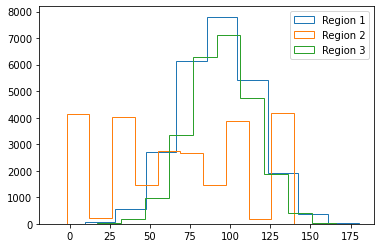

In [13]:
# Distribution of oil reserves by region
plt.hist(predictions_reg1, histtype='step', label='Region 1')
plt.hist(predictions_reg2, histtype='step', label='Region 2')
plt.hist(predictions_reg3, histtype='step', label='Region 3')
plt.legend(loc='upper right')
plt.show()

Although region 2 has obtained the lowest RECM value, when observing how oil reserves are distributed, this area may represent a greater risk since some wells can generate a very low number of barrels. The most attractive regions are 1 and 2 with a similar distribution of oil reserves. In the next stage, the potential profits that each region can generate will be taken into account to make a more informed decision.

# Economic profit estimates

According to the **OilyGiant** drilling project, there is a budget of **100 million dollars** for the development of **200 extraction points**.

When exploring the region, a study is carried out with 500 exploration points with the selection of the **best 200 points** for the calculation of the benefit.

A barrel of raw materials generates \\$4.5 USD of revenue. The income from a unit of product is **\\$4500 USD** (the volume of reserves is expressed in thousands of barrels).

After the risk assessment, only the region with a **loss risk of less than 2.5%** will be maintained. Therefore, the region with the highest average profit will be selected.

Considering the previous conditions, we are going to calculate the minimum volume (in thousands of barrels) to develop a new oil well without economic losses.

In [15]:
# Minimum volume to avoid generating losses

budget = 100000000
num_well = 200
profit_unit = 4500

# Cost per well
well_cost = int(budget / num_well)

# Minimum volume for not generating losses 
vol_min = round(well_cost / profit_unit, 3)

print(f'Budgeted cost per well drilled: {well_cost}')
print(f'Minimum volume to avoid generating losses: {vol_min}')

Budgeted cost per well drilled: 500000
Minimum volume to avoid generating losses: 111.111


Given the budget allocated to drill 200 new wells, each well has a cost of \\$500,000 USD, so **each new drilling must guarantee the minimum extraction of ~111 thousand barrels to avoid generating losses**.

In the previous [table](#table1) we can see that **no region has an average volume greater than 111 thousand barrels**. Because of this it is necessary to carefully select those points within each region that can guarantee this minimum required volume.

# Calculation of earnings and prediction modeling

In this stage of the project we are going to calculate the profit of a set of selected oil wells. For this we are going to define the function **`oil_revenue`** with the following objectives:

1. Choose the wells with the highest reserve predictions
2. Summarize the target volume of reserves according to such predictions
3. Suggest a region for the development of wells based on the benefit for the volume of reserves obtained.

The function takes three parameters:
* `target`: the volume of oil reserves in thousands of barrels
* `predictions`: the predictions generated by each model for each region
* `count`: number of budgeted wells, in this case the goal is to drill 200 wells

The function must select the wells with the highest probability of generating a volume above 111.11 thousand barrels each, that is, they generate a profit greater than an investment of \\$500,000 USD. The function returns the total volume of the 200 selected wells, the income generated according to their reserves and the profit discounting the total investment (budget).

In [18]:
# Fuction 'oil_revenue' for calculating profits

def oil_revenue(target, predictions, count):
    predictions = pd.Series(predictions)                    # Transform predictions into a Series
    target = target.reset_index(drop=True)                  # Restart index to match predictiones
    probs_sorted = predictions.sort_values(ascending=False) # Order the wells from highest to lowest according to their reservea
    selected = target[probs_sorted.index][:count]           # Select the 200 wells with the highest reserves
    reservas = round(selected.sum(), 3)                     # Calculate the total reserve of the 200 wells
    ingreso_total = round(4500*selected.sum(), 3)           # Gets the profit generated among the 200 wells
    revenue = round(ingreso_total - 100000000, 3)           # Profit discounting the total investment
    return reservas, ingreso_total, revenue

In [21]:
# Region 1
reservas_reg1, ingreso_reg1, revenue_reg1 = oil_revenue(r1_target_valid, predictions_reg1, 200)
print(f'''Region 1 
Reserve:       {reservas_reg1} Thousands of Barrels 
Total income: ${ingreso_reg1} USD
Revenue:      ${revenue_reg1} USD''')

Region 1 
Reserve:       29601.836 Thousands of Barrels 
Total income: $133208260.431 USD
Revenue:      $33208260.431 USD


In [22]:
# Region 2
reservas_reg2, ingreso_reg2, revenue_reg2 = oil_revenue(r2_target_valid, predictions_reg2, 200)
print(f'''Region 2 
Reserve:      {reservas_reg2} Thousands of Barrels 
Total income: ${ingreso_reg2} USD
Revenue:      ${revenue_reg2} USD''')

Region 2 
Reserve:      27589.082 Thousands of Barrels 
Total income: $124150866.967 USD
Revenue:      $24150866.967 USD


In [23]:
# Region 3
reservas_reg3, ingreso_reg3, revenue_reg3 = oil_revenue(r3_target_valid, predictions_reg3, 200)
print(f'''Region 3 
Reserve:        {reservas_reg3} Thousands of Barrels 
Total income:  ${ingreso_reg3} USD
Revenue:       ${revenue_reg3} USD''')

Region 3 
Reserve:        28245.222 Thousands of Barrels 
Total income:  $127103499.636 USD
Revenue:       $27103499.636 USD


For the 200 selected wells in each region, the oil reserves are shown in thousands of barrels, the income generated and the profit.

According to our results, the 200 most promising wells in region 1 return the highest profit compared to region 3 and 2 (33 > 27 > 24 million dollars respectively).

Based solely on these predictions, region 1 appears to be more promising; however it is necessary to evaluate the distribution of the probability of the profits to make the correct decision.

# Calculation of risks and revenues for each region

We are going to calculate the profit distribution using the bootstrap technique to generate a profit distribution from 1000 iterations. In each iteration we are going to take a replacement sample of 500 points to explore with their respective predictive values and calculate the profit for the 200 best wells. The profit values will be stored in a list to calculate the distribution, the 95% confidence interval and the risk of loss.

In [24]:
# Bootstrap

def oil_bootstrap(target, predictions):
    state = np.random.RandomState(12345)                              # Sets a RandomState
    values = []                                                       # Empty list to store gain values
    target = target.reset_index(drop=True)
    
    # Bootstrap
    for i in range(1000):                                             # Generates a distribution from 1000 iterations
        target_subsample = target.sample(n=500, replace=True, random_state=state) # Sample 500 points 
        probs_subsample = predictions[target_subsample.index]         # Get predictions of targets
        value = oil_revenue(target_subsample, probs_subsample, 200)[2]# Get only the profit of 200 wells
        values.append(value)                                          # Attach the gains to the values list
    return pd.Series(values)                                          # Returns a series with the profits

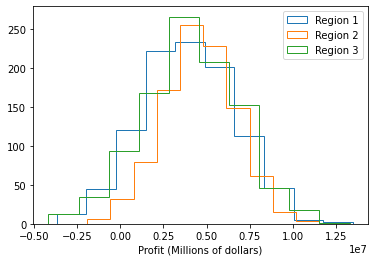

In [25]:
# Boostrap por región 
ganancia_reg1 = oil_bootstrap(r1_target_valid, predictions_reg1) 
ganancia_reg2 = oil_bootstrap(r2_target_valid, predictions_reg2) 
ganancia_reg3 = oil_bootstrap(r3_target_valid, predictions_reg3)

# Distribución de la reserva petrolera por región
plt.hist(ganancia_reg1, histtype='step', label='Region 1')
plt.hist(ganancia_reg2, histtype='step', label='Region 2')
plt.hist(ganancia_reg3, histtype='step', label='Region 3')
plt.legend(loc='upper right')
plt.xlabel('Profit (Millions of dollars)')
plt.show()

The three regions show a similar distribution of profits, based on a random sample, although there is a risk of loss for all of them (see values below 0). For each region we will calculate the average gain and the 95% confidence interval.

In [26]:
# Average gains and 95% confidence interval
def revenue_metrics(revenue):
    average = round(revenue.mean(),3)
    confidence_inverval = [round(revenue.quantile(0.025),3), round(revenue.quantile(0.975),3)]
    print(f'Average revenue: {average}; CI 95%: {confidence_inverval}')

In [27]:
print('Region 1:')
revenue_metrics(ganancia_reg1)

print('\n Region 2:')
revenue_metrics(ganancia_reg2)

print('\n Region 3:')
revenue_metrics(ganancia_reg3)

Region 1:
Average revenue: 3961649.848; CI 95%: [-1112155.459, 9097669.415]

 Region 2:
Average revenue: 4560451.058; CI 95%: [338205.094, 8522894.539]

 Region 3:
Average revenue: 4044038.666; CI 95%: [-1633504.134, 9503595.749]


Region 2 has the highest average gain and its confidence interval does not encompass negative values, so it is likely that it has the lowest risk of loss. We are going to calculate the risk of loss for each region from the profits generated by bootstrap.

To obtain the probability risk of loss (that is, negative gains), we are going to calculate the area under the curve assuming a normal distribution (using the mean and standard deviation as parameters) that are below zero using the cumulative distribution function ( `cdf`). This method is suitable because the distribution generated by bootstrap approximates a normal distribution.

Alternatively, we are going to calculate the percentage of values below zero, that is, the number of cases less than zero among the total cases sampled using bootstrap (i.e. 1000).

In [28]:
# Probabilidad de riesgo de perdida
print('Risk probability for Region 1:',round(st.norm(ganancia_reg1.mean(), ganancia_reg1.std()).cdf(0),3))
print('Risk probability for Region 2:',round(st.norm(ganancia_reg2.mean(), ganancia_reg2.std()).cdf(0),3))
print('Risk probability for Region 3:',round(st.norm(ganancia_reg3.mean(), ganancia_reg3.std()).cdf(0),3))

Risk probability for Region 1: 0.069
Risk probability for Region 2: 0.014
Risk probability for Region 3: 0.069


In [29]:
# Porcentaje de riesgo de perdida
print('Risk percentage for Region 1:', 100 * ganancia_reg1[ganancia_reg1 < 0].count()/1000)
print('Risk percentage for Region 2:', 100 * ganancia_reg1[ganancia_reg2 < 0].count()/1000)
print('Risk percentage for Region 3:', 100 * ganancia_reg1[ganancia_reg3 < 0].count()/1000)

Risk percentage for Region 1: 6.9
Risk percentage for Region 2: 1.5
Risk percentage for Region 3: 7.6


According to our risk estimates, region 2 is the only one that has a risk of loss of less than 2.5%, so according to the company's conditions, this would be the most suitable region to exploit.

# Final recommendations

We have carried out a series of models to predict between three regions which region can generate the highest profits with the lowest risk of investment loss. Let's remember that **OilyGiant** has earmarked 100 million dollars to drill 200 new wells. Each new well has a cost of **500 thousand dollars**, so in order to _not generate losses_ each new well must guarantee a minimum extraction of **111.11 thousand barrels**.

In order to project the region with the highest profitability, the oil reserves of each region were estimated using linear regression models considering three parameters (previously standardized). To calculate the risk of loss, the bootstrap technique was used to generate a distribution of reserves with a thousand records.

Although at first sight region 2 has the lowest requested reserves compared to the other two, its lower risk of loss (<2.5%) makes it potentially the most profitable region to explore.